In [2]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

from math import radians, cos, sin, sqrt, asin

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 50 # None

# returns an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format 

In [8]:
# read csv file using pandas, using training model that will only have 100,000 records and changed trip start/end timestamp to datetime object
df_taxi = pd.read_csv('../python_fare_prediction/ChicagoTaxi.csv')
df_train= pd.read_csv('../python_fare_prediction/ChicagoTaxi.csv', nrows = 100000, parse_dates=["Trip Start Timestamp", "Trip End Timestamp"])

df_taxi.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0000184e7cd53cee95af32eba49c44e4d20adcd8,f538e6b729d1aaad4230e9dcd9dc2fd9a168826ddadbd6...,01/19/2024 05:00:00 PM,01/19/2024 06:00:00 PM,4051.0,17.12,1.703198e+10,1.703132e+10,76.0,32.0,...,4.0,60.00,Credit Card,Flash Cab,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
1,000072ee076c9038868e239ca54185eb43959db0,e51e2c30caec952b40b8329a68b498e18ce8a1f40fa75c...,01/28/2024 02:30:00 PM,01/28/2024 03:00:00 PM,1749.0,12.70,NaN,NaN,6.0,NaN,...,0.0,33.75,Cash,Flash Cab,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),NaN,NaN,NaN
2,000074019d598c2b1d6e77fbae79e40b0461a2fc,aeb280ef3be3e27e081eb6e76027615b0d40925b84d3eb...,01/05/2024 09:00:00 AM,01/05/2024 09:00:00 AM,517.0,3.39,NaN,NaN,6.0,8.0,...,1.0,14.69,Mobile,Taxicab Insurance Agency Llc,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
3,00007572c5f92e2ff067e6f838a5ad74e83665d3,7d21c2ca227db8f27dda96612bfe5520ab408fa9a462c8...,01/22/2024 08:45:00 AM,01/22/2024 09:30:00 AM,2050.0,15.06,NaN,NaN,76.0,NaN,...,5.5,56.56,Credit Card,Globe Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
4,00007c3e7546e2c7d15168586943a9c22c3856cf,8ef1056519939d511d24008e394f83e925d2539d668a00...,01/18/2024 07:15:00 PM,01/18/2024 07:30:00 PM,1004.0,1.18,1.703184e+10,1.703184e+10,32.0,32.0,...,0.0,19.66,Mobile,5 Star Taxi,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [9]:
df_train.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0000184e7cd53cee95af32eba49c44e4d20adcd8,f538e6b729d1aaad4230e9dcd9dc2fd9a168826ddadbd6...,2024-01-19 17:00:00,2024-01-19 18:00:00,4051.0,17.12,1.703198e+10,1.703132e+10,76.0,32.0,...,4.0,60.00,Credit Card,Flash Cab,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
1,000072ee076c9038868e239ca54185eb43959db0,e51e2c30caec952b40b8329a68b498e18ce8a1f40fa75c...,2024-01-28 14:30:00,2024-01-28 15:00:00,1749.0,12.70,NaN,NaN,6.0,NaN,...,0.0,33.75,Cash,Flash Cab,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),NaN,NaN,NaN
2,000074019d598c2b1d6e77fbae79e40b0461a2fc,aeb280ef3be3e27e081eb6e76027615b0d40925b84d3eb...,2024-01-05 09:00:00,2024-01-05 09:00:00,517.0,3.39,NaN,NaN,6.0,8.0,...,1.0,14.69,Mobile,Taxicab Insurance Agency Llc,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
3,00007572c5f92e2ff067e6f838a5ad74e83665d3,7d21c2ca227db8f27dda96612bfe5520ab408fa9a462c8...,2024-01-22 08:45:00,2024-01-22 09:30:00,2050.0,15.06,NaN,NaN,76.0,NaN,...,5.5,56.56,Credit Card,Globe Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
4,00007c3e7546e2c7d15168586943a9c22c3856cf,8ef1056519939d511d24008e394f83e925d2539d668a00...,2024-01-18 19:15:00,2024-01-18 19:30:00,1004.0,1.18,1.703184e+10,1.703184e+10,32.0,32.0,...,0.0,19.66,Mobile,5 Star Taxi,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [10]:
df_train.shape

(100000, 23)

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Trip ID                     100000 non-null  object        
 1   Taxi ID                     100000 non-null  object        
 2   Trip Start Timestamp        100000 non-null  datetime64[ns]
 3   Trip End Timestamp          100000 non-null  datetime64[ns]
 4   Trip Seconds                99980 non-null   float64       
 5   Trip Miles                  99998 non-null   float64       
 6   Pickup Census Tract         36974 non-null   float64       
 7   Dropoff Census Tract        35334 non-null   float64       
 8   Pickup Community Area       97407 non-null   float64       
 9   Dropoff Community Area      89803 non-null   float64       
 10  Fare                        99791 non-null   float64       
 11  Tips                        99791 non-nu

In [12]:
df_train.dtypes

Trip ID                               object
Taxi ID                               object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                         float64
Trip Miles                           float64
Pickup Census Tract                  float64
Dropoff Census Tract                 float64
Pickup Community Area                float64
Dropoff Community Area               float64
Fare                                 float64
Tips                                 float64
Tolls                                float64
Extras                               float64
Trip Total                           float64
Payment Type                          object
Company                               object
Pickup Centroid Latitude             float64
Pickup Centroid Longitude            float64
Pickup Centroid Location              object
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Dropoff Ce

In [13]:
df_train.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,99980.000000,99998.000000,3.697400e+04,3.533400e+04,97407.000000,89803.000000,99791.000000,99791.000000,99791.000000,99791.000000,99791.000000,97435.000000,97435.000000,90390.000000,90390.000000
mean,1152.593309,6.614187,1.703153e+10,1.703142e+10,37.041763,25.868379,22.382823,2.777796,0.114120,2.326209,27.773771,41.903526,-87.707877,41.892954,-87.660483
std,1622.810878,7.516127,3.741517e+05,3.389287e+05,26.718498,20.683657,36.771935,4.149209,19.904902,27.011337,58.766642,0.066691,0.117046,0.059533,0.069175
min,0.000000,0.000000,1.703102e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,458.000000,0.900000,1.703109e+10,1.703108e+10,8.000000,8.000000,8.250000,0.000000,0.000000,0.000000,10.000000,41.878866,-87.769615,41.878866,-87.663518
50%,913.000000,3.080000,1.703132e+10,1.703132e+10,32.000000,28.000000,16.250000,0.000000,0.000000,0.000000,19.500000,41.899156,-87.642649,41.892508,-87.633308
75%,1589.000000,11.790000,1.703198e+10,1.703184e+10,75.000000,32.000000,34.000000,4.000000,0.000000,4.000000,42.000000,41.979071,-87.626211,41.922686,-87.625192
max,86135.000000,664.900000,1.703198e+10,1.703198e+10,77.000000,77.000000,9999.750000,105.000000,4444.440000,5051.100000,9999.750000,42.009623,-87.534903,42.021224,-87.534903


In [4]:
df_taxi.shape

(2555596, 23)

In [5]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555596 entries, 0 to 2555595
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Taxi ID                     object 
 2   Trip Start Timestamp        object 
 3   Trip End Timestamp          object 
 4   Trip Seconds                float64
 5   Trip Miles                  float64
 6   Pickup Census Tract         float64
 7   Dropoff Census Tract        float64
 8   Pickup Community Area       float64
 9   Dropoff Community Area      float64
 10  Fare                        float64
 11  Tips                        float64
 12  Tolls                       float64
 13  Extras                      float64
 14  Trip Total                  float64
 15  Payment Type                object 
 16  Company                     object 
 17  Pickup Centroid Latitude    float64
 18  Pickup Centroid Longitude   float64
 19  Pickup Centroid Locat

In [6]:
#checking the influence or correlation of input variables latitude and longitude on the fare cost
corr_matrix = df_taxi.corr()
corr_matrix['Fare'].sort_values(ascending=False)

Fare                          1.000000
Trip Total                    0.827233
Trip Miles                    0.555852
Pickup Census Tract           0.473548
Pickup Community Area         0.365341
Trip Seconds                  0.315925
Tips                          0.304178
Pickup Centroid Latitude      0.146745
Dropoff Community Area        0.122469
Dropoff Census Tract          0.092517
Extras                        0.080770
Tolls                         0.002335
Dropoff Centroid Latitude     0.001976
Dropoff Centroid Longitude   -0.133896
Pickup Centroid Longitude    -0.384068
Name: Fare, dtype: float64

In [7]:
df_taxi.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,2.555101e+06,2.555586e+06,1.061615e+06,1.024139e+06,2.484164e+06,2.311391e+06,2.548130e+06,2.548130e+06,2.548130e+06,2.548130e+06,2.548130e+06,2.485354e+06,2.485354e+06,2.325164e+06,2.325164e+06
mean,1.246171e+03,6.717532e+00,1.703152e+10,1.703142e+10,3.650894e+01,2.620673e+01,2.270390e+01,2.926393e+00,3.861734e-02,2.191889e+00,2.804801e+01,4.190214e+01,-8.770428e+01,4.189260e+01,-8.766125e+01
std,1.605092e+03,8.224567e+00,3.748361e+05,3.430942e+05,2.642471e+01,2.081092e+01,2.863820e+01,4.267669e+00,8.075645e+00,1.492693e+01,3.770332e+01,6.560604e-02,1.153997e-01,5.879656e-02,7.149854e-02
min,0.000000e+00,0.000000e+00,1.703101e+10,1.703101e+10,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.165022e+01,-8.791362e+01,4.165022e+01,-8.791362e+01
25%,4.800000e+02,9.700000e-01,1.703108e+10,1.703108e+10,8.000000e+00,8.000000e+00,8.250000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.025000e+01,4.187887e+01,-8.776851e+01,4.187887e+01,-8.766352e+01
50%,9.600000e+02,3.200000e+00,1.703132e+10,1.703132e+10,3.200000e+01,2.800000e+01,1.625000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.950000e+01,4.189503e+01,-8.764265e+01,4.189207e+01,-8.763331e+01
75%,1.711000e+03,1.196000e+01,1.703198e+10,1.703184e+10,6.900000e+01,3.200000e+01,3.475000e+01,4.120000e+00,0.000000e+00,4.000000e+00,4.350000e+01,4.197907e+01,-8.762519e+01,4.192269e+01,-8.762519e+01
max,8.637900e+04,3.397800e+03,1.703198e+10,1.703198e+10,7.700000e+01,7.700000e+01,9.999750e+03,4.000000e+02,4.444440e+03,5.559500e+03,9.999750e+03,4.202122e+01,-8.753139e+01,4.202122e+01,-8.753490e+01


In [14]:
#date cleaning & feature engineering of training data set
#we start with finding data with no value *zero indicates no null values anything greater indicates empty values count
print(df_train.isnull().sum())

Trip ID                           0
Taxi ID                           0
Trip Start Timestamp              0
Trip End Timestamp                0
Trip Seconds                     20
Trip Miles                        2
Pickup Census Tract           63026
Dropoff Census Tract          64666
Pickup Community Area          2593
Dropoff Community Area        10197
Fare                            209
Tips                            209
Tolls                           209
Extras                          209
Trip Total                      209
Payment Type                      0
Company                           0
Pickup Centroid Latitude       2565
Pickup Centroid Longitude      2565
Pickup Centroid Location       2565
Dropoff Centroid Latitude      9610
Dropoff Centroid Longitude     9610
Dropoff Centroid  Location     9610
dtype: int64


In [15]:
train = df_train.dropna(how = 'any', axis = 'rows')

In [16]:
print('Old size: %d' % len(train))

Old size: 34450


In [18]:
#there should not be any negative fares and there is a limit of fare charged in certain cases, for example limits of $250
#also the min fare in chicago is $2.25

train = df_train.drop(df_train[df_train.Fare<2.25].index, axis = 0)
train = df_train.drop(df_train[df_train.Fare>275].index, axis = 0)

In [19]:
#next take out pick up latitudes that have values greater than 90 and less than -90, as latitudes remain between -90 and 90 degrees
train = df_train.drop(df_train[df_train['Pickup Centroid Latitude']<-90].index, axis = 0)
train = df_train.drop(df_train[df_train['Pickup Centroid Latitude']>90].index, axis = 0)

In [20]:
#again we need to take out longitudes that have values greater than 180 and less than -180
train = df_train.drop(df_train[df_train['Pickup Centroid Longitude']<-180].index, axis = 0)
train = df_train.drop(df_train[df_train['Pickup Centroid Longitude']>180].index, axis = 0)

In [21]:
#we will repeat for the dropoff longitude and latitude
train = df_train.drop(df_train[df_train['Dropoff Centroid Latitude']<-90].index, axis = 0)
train = df_train.drop(df_train[df_train['Dropoff Centroid Latitude']>90].index, axis = 0)

train = df_train.drop(df_train[df_train['Dropoff Centroid Longitude']<-180].index, axis = 0)
train = df_train.drop(df_train[df_train['Dropoff Centroid Longitude']>180].index, axis = 0)

In [34]:
#now we want to remove trips that occurred outside of the chicago city limits
def select_outside_boundingbox(df, BB):
    filter_df = df.loc[(df['Pickup Centroid Longitude'] < BB[0]) | (df['Pickup Centroid Longitude'] > BB[1]) | \
           (df['Pickup Centroid Latitude'] < BB[2]) | (df['Pickup Centroid Latitude'] > BB[3]) | \
           (df['Dropoff Centroid Longitude'] < BB[0]) | (df['Dropoff Centroid Longitude'] > BB[1]) | \
           (df['Dropoff Centroid Latitude'] < BB[2]) | (df['Dropoff Centroid Latitude'] > BB[3])]
    
    return filter_df

CHI_BB = (-87.8, -87.6, 41.8, 42.0)

In [35]:
outliers = select_outside_boundingbox(df_train, CHI_BB)
outliers

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0000184e7cd53cee95af32eba49c44e4d20adcd8,f538e6b729d1aaad4230e9dcd9dc2fd9a168826ddadbd6...,2024-01-19 17:00:00,2024-01-19 18:00:00,4051.0,17.12,1.703198e+10,1.703132e+10,76.0,32.0,...,4.0,60.00,Credit Card,Flash Cab,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
3,00007572c5f92e2ff067e6f838a5ad74e83665d3,7d21c2ca227db8f27dda96612bfe5520ab408fa9a462c8...,2024-01-22 08:45:00,2024-01-22 09:30:00,2050.0,15.06,NaN,NaN,76.0,NaN,...,5.5,56.56,Credit Card,Globe Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
7,0001235258d46a21317b6691ade9386c4d7e02c4,715b091e1001d1c17938c3b5ed7e23d926c53150ee2d0f...,2024-01-25 11:15:00,2024-01-25 11:30:00,1686.0,13.01,1.703132e+10,1.703198e+10,32.0,56.0,...,5.0,47.70,Credit Card,Chicago Independents,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.785999,-87.750934,POINT (-87.7509342894 41.785998518)
9,00012d162a043f81c15d07cd9117032f2b96cf11,31760477ea8a53823f828158e65e02b57866ed72ce86b7...,2024-01-20 16:00:00,2024-01-20 16:45:00,2503.0,16.48,1.703198e+10,1.703108e+10,76.0,8.0,...,4.0,46.00,Cash,Taxicab Insurance Agency Llc,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.892508,-87.626215,POINT (-87.6262149064 41.8925077809)
10,00014a3819e7fc5e991ecd2593d6529a931e5a2e,9492b268e840fcd19b554ae0d61ab86a48eee56b7fba98...,2024-01-17 13:30:00,2024-01-17 13:45:00,903.0,11.25,NaN,NaN,49.0,35.0,...,0.0,28.75,Prcard,City Service,41.706588,-87.623367,POINT (-87.6233665115 41.7065878819),41.835118,-87.618678,POINT (-87.6186777673 41.8351179863)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,3e7684e96edf2689d73bccd31a0f112e80c8752a,4beea83b52b76272fc17484086dadd3d1ea3fe1a8f38f8...,2024-01-13 21:45:00,2024-01-13 22:15:00,1800.0,16.10,NaN,NaN,56.0,7.0,...,5.5,55.00,Credit Card,"Taxicab Insurance Agency, LLC",41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
99988,3e76a4ce7713baddbc71b4ddf74403d1794ef85a,7274daf07dd4da878465e03ee2f72165d7e044bcde1c2c...,2024-01-17 06:15:00,2024-01-17 06:30:00,952.0,5.22,NaN,NaN,6.0,1.0,...,0.0,15.75,Prcard,Flash Cab,41.944227,-87.655998,POINT (-87.6559981815 41.9442266014),42.009623,-87.670167,POINT (-87.6701668569 42.0096228806)
99989,3e76b3001566cc20a4656c855027415a984d6b15,2d72c5e6313ad93f663008a55045cad0c76164b057dcb7...,2024-01-03 10:30:00,2024-01-03 10:45:00,841.0,5.17,NaN,NaN,76.0,76.0,...,4.0,20.50,Credit Card,City Service,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.980264,-87.913625,POINT (-87.913624596 41.9802643146)
99990,3e76dfccc9dc14a092393361df5630c54f3be699,d602f9bb68112218c45e7826be734f26389b11ddadce44...,2024-01-06 17:00:00,2024-01-06 18:00:00,2940.0,7.20,NaN,NaN,69.0,68.0,...,0.0,29.00,Unknown,Taxi Affiliation Services,41.763247,-87.616134,POINT (-87.6161341112 41.7632467988),41.777196,-87.642498,POINT (-87.6424975271 41.7771962546)


In [24]:
train = df_train.drop(outliers.index, axis = 0)

In [25]:
print('New size: %d' % len(train))

New size: 56403


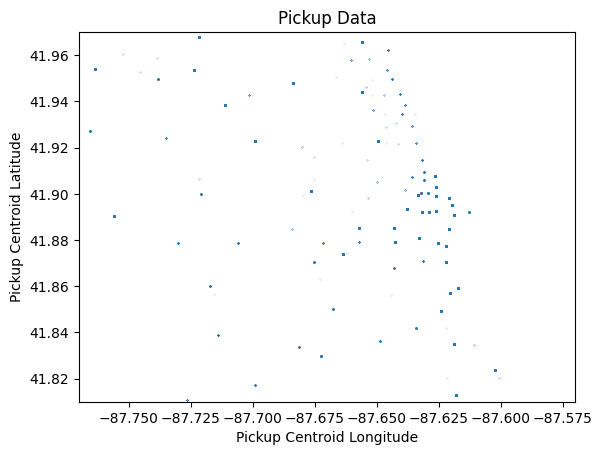

In [30]:
# map visualization of the trips around chicago within city limits
train.plot(y='Pickup Centroid Latitude',x='Pickup Centroid Longitude',kind="scatter",alpha=0.7,s=0.02)
city_long_border = (-87.77, -87.57)
city_lat_border = (41.81, 41.97)
plt.title("Pickup Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

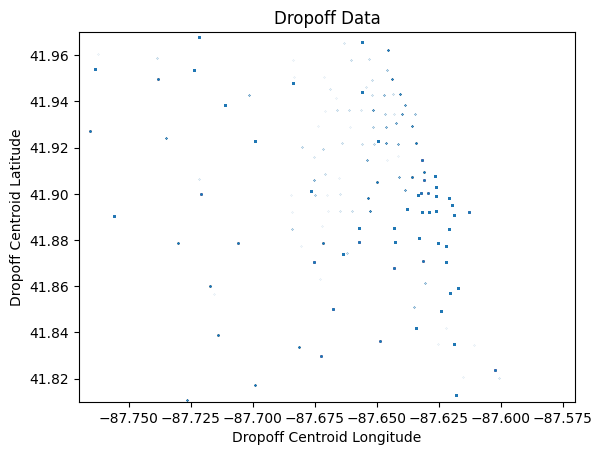

In [27]:
train.plot(y='Dropoff Centroid Latitude',x='Dropoff Centroid Longitude',kind="scatter",alpha=0.5,s=0.02)
city_long_border = (-87.77, -87.57)
city_lat_border = (41.81, 41.97)
plt.title("Dropoff Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

(0.0, 100.0)

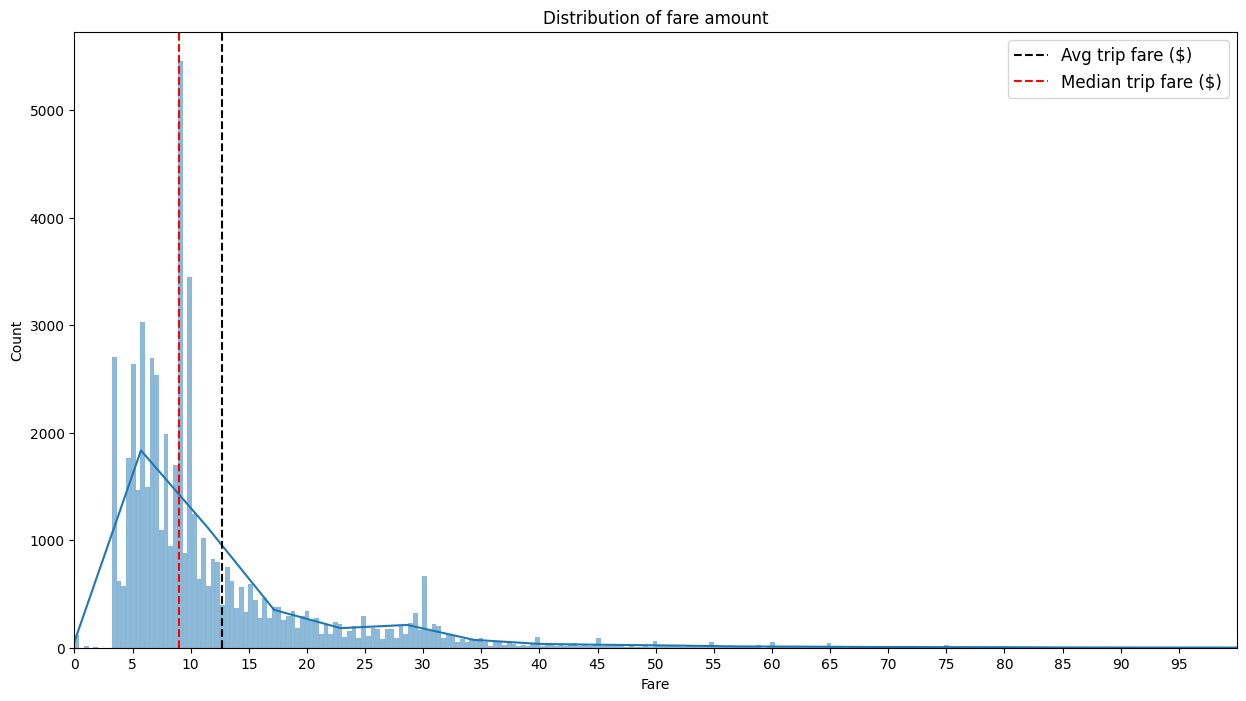

In [40]:
#EDA, the model is right-skewed and our take aways are that most fares range from $2.25-$22
#The average taxi fee is between $9-$13
#Peak fares begin at $30, which is fixed.

sns.histplot(data=train,x="Fare",kde=True)

plt.axvline(train["Fare"].mean(),color = "k",
            linestyle = "dashed",label = "Avg trip fare ($)")
plt.axvline(train["Fare"].median(),color = "r",
            linestyle = "dashed",label = "Median trip fare ($)")

plt.title("Distribution of fare amount")
plt.xticks(np.arange(0, 100, step=5))
plt.legend(loc = "best",prop = {"size" : 12})
plt.gcf().set_size_inches(15,8)
plt.xlim(0,100)

(0.0, 30.0)

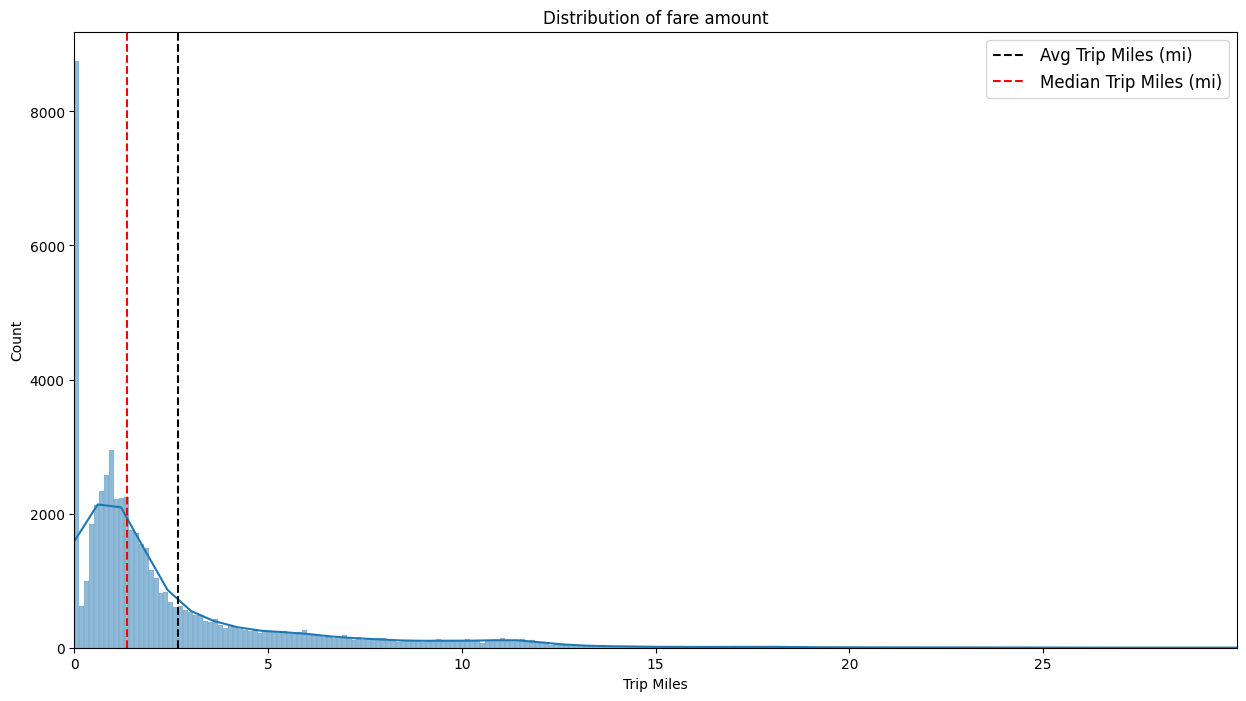

In [41]:
#riders often travel an average of 2-5 mi by taxi
sns.histplot(data=train,x="Trip Miles",kde=True)

plt.axvline(train["Trip Miles"].mean(),color = "k",
            linestyle = "dashed",label = "Avg Trip Miles (mi)")
plt.axvline(train["Trip Miles"].median(),color = "r",
            linestyle = "dashed",label = "Median Trip Miles (mi)")

plt.title("Distribution of fare amount")
plt.xticks(np.arange(0, 30, step=5))
plt.legend(loc = "best",prop = {"size" : 12})
plt.gcf().set_size_inches(15,8)
plt.xlim(0,30)

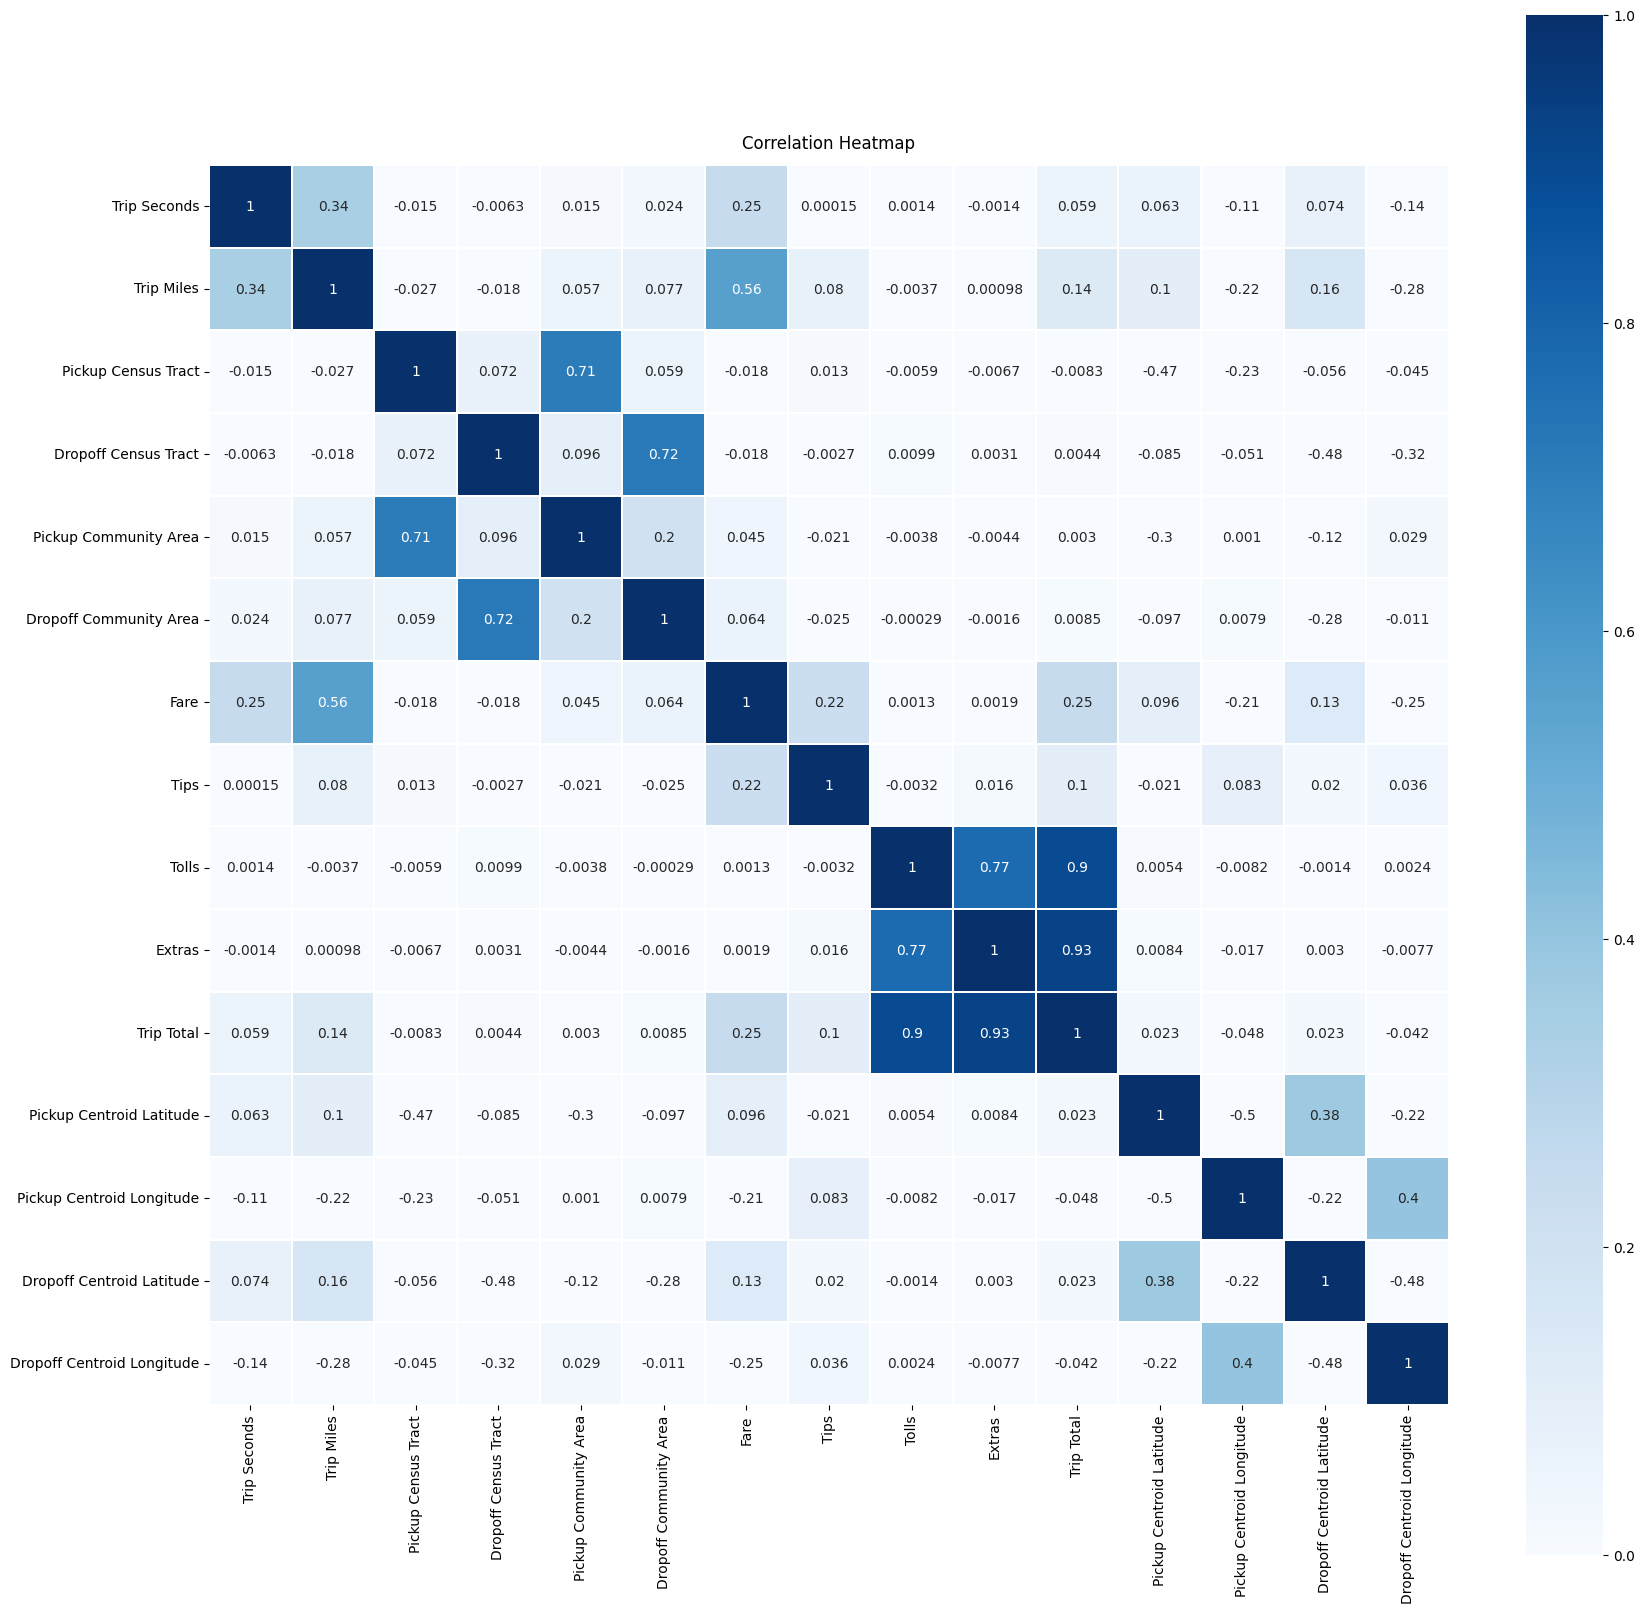

In [42]:
#print full correlation chart to see how each column affects the fare amount 
colormap = plt.cm.RdBu
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0,vmin=0, 
            square=True, cmap="Blues", linecolor='white', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [45]:
#correlation is not strong between fare and trip miles so we will try other observations.
train[['Fare','Trip Miles']].corr()

,Fare,Trip Miles
Fare,1.000000,0.559941
Trip Miles,0.559941,1.000000
